# Figures for X, X_val, Ht, yt

In [1]:
!ls 


figures_content_aware.ipynb	  ht_train(False).pdf	 x_pred_(False).pdf
figures_previous.ipynb		  ht_train(True).pdf	 x_pred_(True).pdf
figures_segmentation-Copy1.ipynb  ht_train(True).png	 x_pred_(True).png
figures_segmentation.ipynb	  out.pdf		 x_(True).pdf
figures_to_poster.zip		  output.txt		 x_(True).png
figures_transposeconv.ipynb	  poster_heatmaps.ipynb  yt_train(False).pdf
heatmaps.pdf			  x_(False).pdf		 yt_train(True).pdf


In [2]:
data_dir = f'/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/important/exp_set1'


In [3]:
!ls /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs_cvpr/

set1


In [4]:
def show_Hts(ht):
    #plt.figure(figsize= (15,3.2))

    ticks = list(map(int,np.linspace(0, 128, 5)))
    tick_fontsize= 13

    T= ht.shape[1]
    if T>5:T=5
    for i in range(T):
        plt.subplot(1,5,i+1)
        plt.imshow(ht[img_id,i], cmap='gray')
        plt.axis('off')
        plt.yticks(ticks, ticks, rotation=0, fontsize=tick_fontsize)
        plt.xticks(ticks, ticks, rotation=0, fontsize=tick_fontsize)
    plt.tight_layout()

def show_yt(yt):
    #plt.figure(figsize= (15,3.2))
    T= ht.shape[1]
    if T>4:T=4
    
    all_ones_grid= torch.ones((4, 1, yt.shape[2], yt.shape[3]))
    all_ones_grid[0:T, :, :, :]= yt[img_id, 0:T]
    
    
    
    ticks = list(map(int,np.linspace(0, 128, 5)))
    tick_fontsize= 13
    T= ht.shape[1]
    
    for i in range(T):
        plt.subplot(1,5,i+1)
        plt.imshow(yt[img_id,i])
        plt.axis('off')
        plt.yticks(ticks, ticks, rotation=0, fontsize=tick_fontsize)
        plt.xticks(ticks, ticks, rotation=0, fontsize=tick_fontsize)
    plt.tight_layout()

def show_real(x):
    #plt.figure(figsize= (5,5))
    plt.imshow(x[img_id,0])
    plt.axis('off')
    #plt.tight_layout()
    
def show_pred(x_pred):
    #plt.figure(figsize= (5,5))
    plt.imshow(x_pred[img_id,0])
    plt.axis('off')
    #plt.tight_layout()


In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def show_all(lambda_r, lr_H, H_init, dataset_name, Ts, lambda_ss):
    plt.figure(figsize = (len(Ts) * 4, 4))

    for i in range(len(Ts)):
        T= Ts[i]
        lambda_s= lambda_ss[i]
        np_img_dirs = sorted(glob.glob(f'{data_dir}/name({dataset_name})@rotation_lambda({lambda_r})@lambda_scale_factor({lambda_s})@T({T})@lr_H({lr_H})@H_init({H_init})@img_size(256)@num_samples_train(3000)@upsample_net(learnable_transpose_conv)/save_special/150*'))
        x_pred = np.load(np_img_dirs[1])
        plt.subplot(1, len(Ts), i+1)
        show_real(x_pred)
        

def show_yt(lambda_r, lr_H, H_init, dataset_name, Ts, lambda_ss):
    plt.figure(figsize = (len(Ts) * 4, 4))

    for i in range(len(Ts)):
        T= Ts[i]
        lambda_s= lambda_ss[i]
        np_img_dirs = sorted(glob.glob(f'{data_dir}/name({dataset_name})@rotation_lambda({lambda_r})@lambda_scale_factor({lambda_s})@T({T})@lr_H({lr_H})@H_init({H_init})@img_size(256)@num_samples_train(3000)@upsample_net(learnable_transpose_conv)/save_special/150*'))
        yt = np.load(np_img_dirs[3])
        plt.subplot(1, len(Ts), i+1)
        show_yt(yt)


In [6]:
!mkdir ./figs_transposeconv

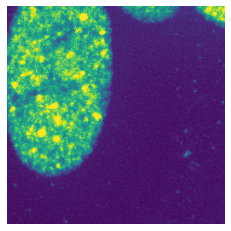

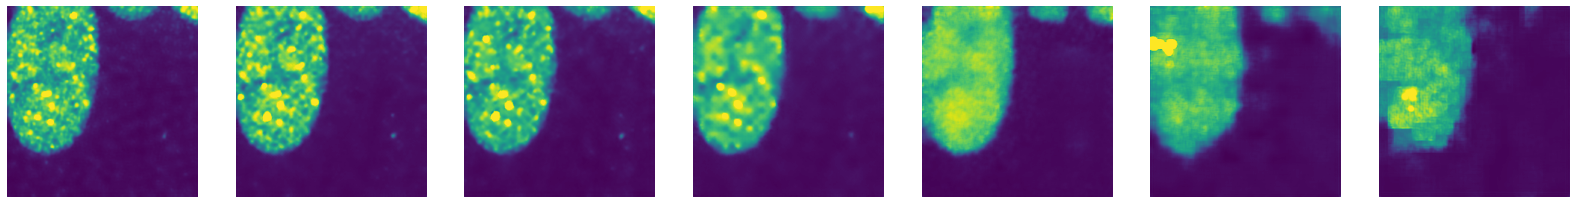

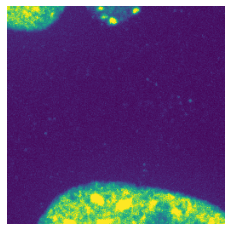

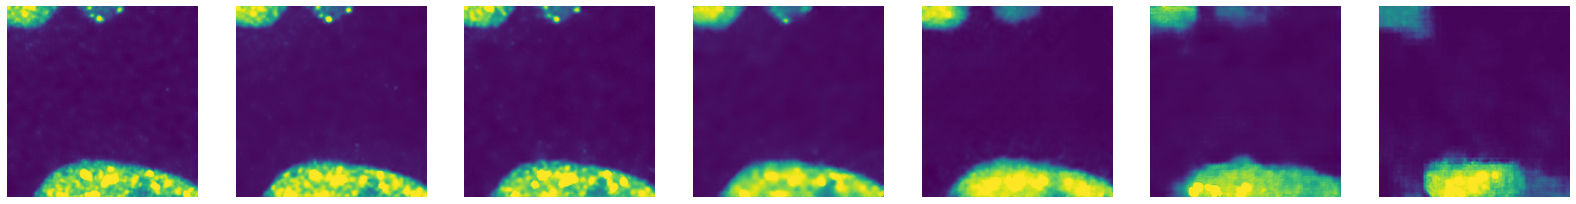

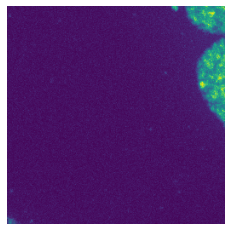

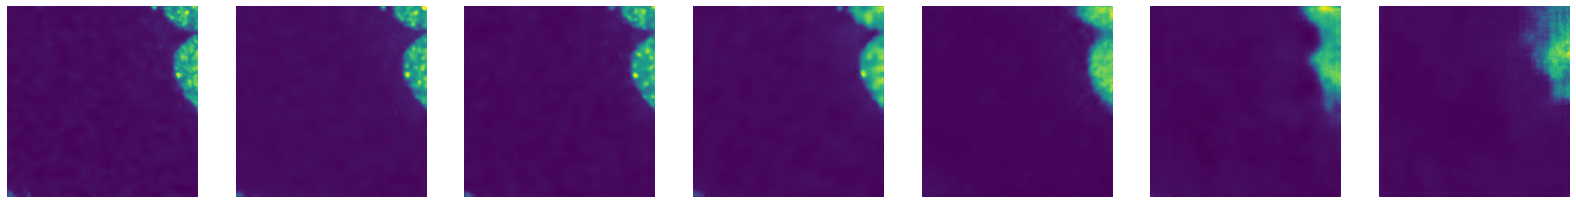

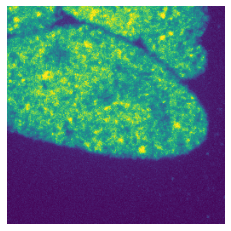

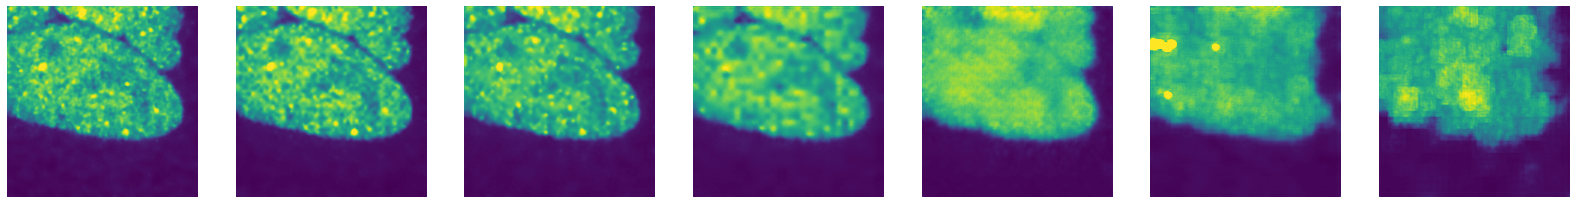

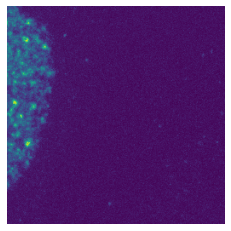

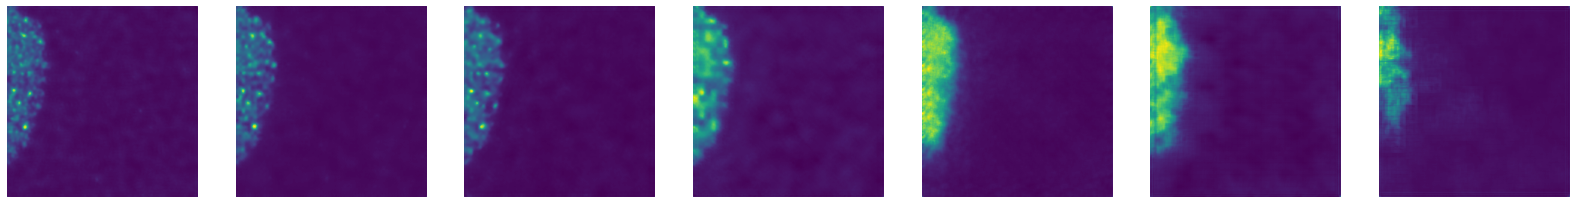

In [13]:

#########

for img_id in [0, 1, 4, 5, 13]:
    show_real(np.load(sorted(glob.glob(f'{data_dir}/*/save_special/150*.npy'))[2]))
    plt.savefig(f'./figs_transposeconv/{img_id}_gt.png', dpi= 500)

    #########
    lambda_r = '10.0'
    dataset_name = 'confocal'

    H_init= 'randn_FourierBased'
    lr_H= '1.0'

    Ts = ['4', '4', '1', '1', '4', '4', '4']
    lambda_ss = ['2', '3', '3', '4', '6', '7', '8']

    show_all(lambda_r, lr_H, H_init, dataset_name, Ts, lambda_ss)
    #plt.suptitle('rowa: learned, not_learned (randn), not_learned (hadamard), not_learned (uniformones) | cols: x1, x4, x16, x64, x256, x1024, x4096')
    plt.savefig(f'./figs_transposeconv/{img_id}.png')
    plt.show()